[]


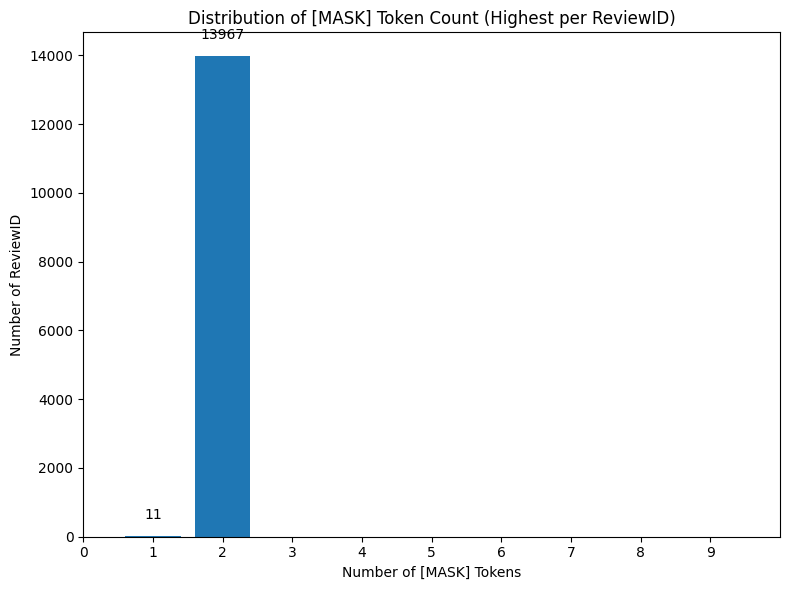

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(r"/home/akoirala/Thesis/Data-Pipeline/random_dataset/random_0.15/top_6_train.csv")

# Compute the number of '[MASK]' tokens for each row
df['MASK_count'] = df['Masked Background'].apply(lambda x: x.count('[MASK]'))

# Sort the dataframe and drop duplicates based on ReviewID
df_sorted = df.sort_values(by=['ReviewID', 'MASK_count'], ascending=[True, False]).drop_duplicates(subset='ReviewID', keep='first')

# Print ReviewIDs where there are 0 [MASK] tokens
review_ids_with_0_masks = df_sorted[df_sorted['MASK_count'] == 0]['ReviewID'].tolist()
print(review_ids_with_0_masks)

# Get the distribution of the MASK count
dist = df_sorted['MASK_count'].value_counts().sort_index()

# Plotting the distribution
plt.figure(figsize=(8, 6))
plt.xlim(0, 10)
plt.xticks(range(10))  # To show all ticks from 0 to 5 inclusive
bars = plt.bar(dist.index, dist.values)
plt.xlabel('Number of [MASK] Tokens')
plt.ylabel('Number of ReviewID')
plt.title('Distribution of [MASK] Token Count (Highest per ReviewID)')
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f'{yval}', 
                 (bar.get_x() + bar.get_width() / 2, yval),
                 ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import os
main_dir = r'/home/akoirala/Thesis/Data-Pipeline/random_dataset'

# This dictionary will store summary DataFrames for each masking ratio
summary_dfs = {
    "0.15": pd.DataFrame(),
    "0.3": pd.DataFrame(),
    "0.45": pd.DataFrame()
}

for subdir, _, files in os.walk(main_dir):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(subdir, file)
            dataset_type = file.split('_')[-1]  # Extracting "train", "dev", or "test" from filename
            data1 = dataset_type.split('.')[0]
            masking_ratio = subdir.split('\\')[-1].split('_')[-1]  # Extracting "0.15", "0.3", or "0.45" from the subdir
            df = pd.read_csv(file_path)
            
            # Considering only unique ReviewID entries for MASK count
            unique_df = df.drop_duplicates(subset='ReviewID')
            
            unique_df['MASK_count'] = unique_df['Masked Background'].apply(lambda x: x.count('[MASK]'))
            dist = unique_df['MASK_count'].value_counts().sort_index()
            
            # Add the distribution to the respective summary DataFrame
            summary_dfs[masking_ratio][data1] = dist
            
with open('/home/akoirala/Thesis/Data-Pipeline/summary_random_with_Average_Mask_token.txt', 'w') as file:
    for ratio, summary_df in summary_dfs.items():
        print(ratio)
        summary_df = summary_df.fillna(0).astype(int)
        file.write(f"\nSummary for masking ratio TF-IDF with Average Mask Token {ratio}:\n\n")
        file.write(summary_df.to_string())
        file.write('\n\n')

/tmp/ipykernel_86004/2359520953.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['MASK_count'] = unique_df['Masked Background'].apply(lambda x: x.count('[MASK]'))
/tmp/ipykernel_86004/2359520953.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['MASK_count'] = unique_df['Masked Background'].apply(lambda x: x.count('[MASK]'))
/tmp/ipykernel_86004/2359520953.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

0.15
0.3
0.45


/tmp/ipykernel_86004/2359520953.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['MASK_count'] = unique_df['Masked Background'].apply(lambda x: x.count('[MASK]'))


In [ ]:


main_dir = r'/home/akoirala/Thesis/Data-Pipeline/random_dataset'

# This dictionary will store summary DataFrames for each masking ratio
summary_dfs = {
    "0.15": pd.DataFrame(),
    "0.3": pd.DataFrame(),
    "0.45": pd.DataFrame()
}

for subdir, _, files in os.walk(main_dir):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(subdir, file)
            dataset_type = file.split('_')[0]  # Extracting "train", "dev", or "test" from filename
            masking_ratio = subdir.split('\\')[-1].split('_')[-1]  # Extracting "0.15", "0.3", or "0.45" from the subdir
            print(masking_ratio)
            print('........')
            print(dataset_type)
                df = pd.read_csv(file_path)
            
            # Considering only unique ReviewID entries for MASK count
            unique_df = df.drop_duplicates(subset='ReviewID')
            
            unique_df['MASK_count'] = unique_df['Masked Background'].apply(lambda x: x.count('[MASK]'))
            dist = unique_df['MASK_count'].value_counts().sort_index()
            
            # Add the distribution to the respective summary DataFrame
            summary_dfs[masking_ratio][dataset_type] = dist
            
with open('/home/akoirala/Thesis/Data-Pipeline/summary_random_with_Average_Mask_token.txt', 'w') as file:
    for ratio, summary_df in summary_dfs.items():
        print(ratio)
        summary_df = summary_df.fillna(0).astype(int)
        file.write(f"\nSummary for masking ratio TF-IDF with Average Mask Token {ratio}:\n\n")
        file.write(summary_df.to_string())
        file.write('\n\n')


KeyError: 'masked_background_Pipeline/random_dataset/random_0.15'